In [1]:
import google.generativeai as genai

In [ ]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [3]:
texts = [
    'byeongchan is eating nonstop',
    'byeongchan overwelms with joy because of the delicious food',
    'byeongchan is piggy eating nonstop',
    'byeongchan is so happy because of the delicious food',
    'pig is eating nonstop',
    'byeongchan > pig',
    'byeongchan is slim',
    'hablo espanol un poco'
]

resp = genai.embed_content(model = 'models/text-embedding-004', 
                           content = texts,
                           task_type = 'semantic_similarity')


In [4]:
def truncate(t: str, limit: int = 50) -> str:
  """Truncate labels to fit on the chart."""
  if len(t) > limit:
    return t[:limit-3] + '...'
  else:
    return t

truncated_texts = [truncate(t) for t in texts]

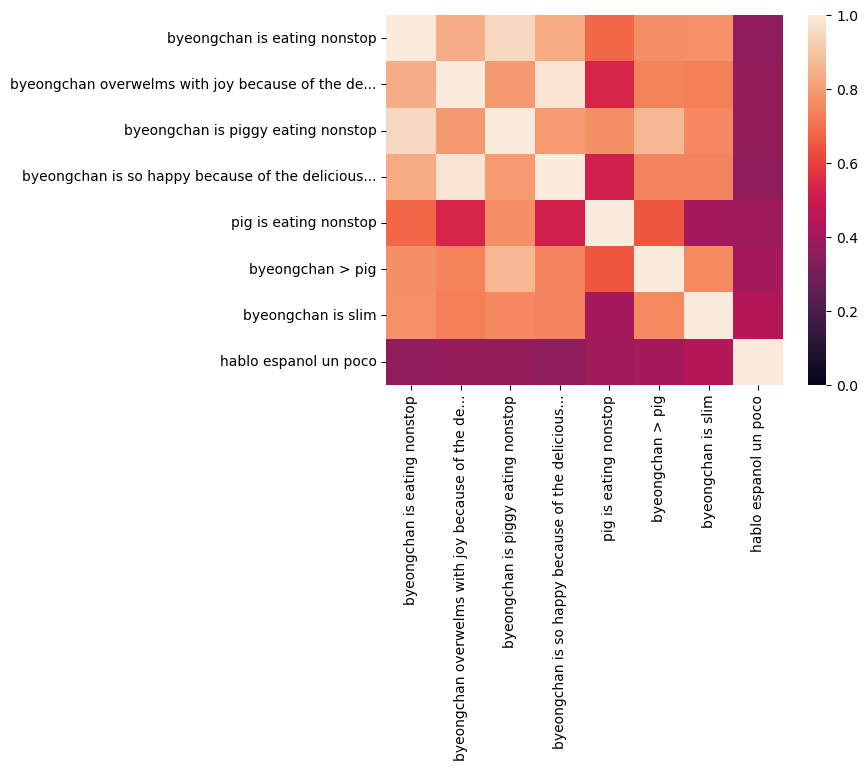

In [7]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(resp['embedding'], index=truncated_texts)
sim = df @ df.T
sns.heatmap(sim, vmin=0,vmax=1);

In [8]:
sim['byeongchan is eating nonstop'].sort_values(ascending=False)

byeongchan is eating nonstop                          0.999999
byeongchan is piggy eating nonstop                    0.947396
byeongchan overwelms with joy because of the de...    0.836372
byeongchan is so happy because of the delicious...    0.834840
byeongchan is slim                                    0.772358
byeongchan > pig                                      0.768240
pig is eating nonstop                                 0.683172
hablo espanol un poco                                 0.359944
Name: byeongchan is eating nonstop, dtype: float64

In [9]:
sim['byeongchan > pig'].sort_values(ascending=False)

byeongchan > pig                                      0.999999
byeongchan is piggy eating nonstop                    0.864858
byeongchan is eating nonstop                          0.768240
byeongchan is slim                                    0.756699
byeongchan is so happy because of the delicious...    0.743590
byeongchan overwelms with joy because of the de...    0.738966
pig is eating nonstop                                 0.650354
hablo espanol un poco                                 0.410600
Name: byeongchan > pig, dtype: float64